# Mock exam paper - solutions

## Question 1


### (a) **definition of a Normal form game**:

An \\(N\\) player normal form game consists of:

- A finite set of $N$ players
- Strategy spaces for the players: $\{S_1,S_2,S_3,\dots,S_N\}$;
- Payoff functions for the players: $u_i:S_1\times S_2\dots\times S_N\to\mathbb{R}$

[2]

### (b) **utilities of strategies**

(i) $$\sigma_r A \sigma_c = 1\qquad \sigma_r B \sigma_c = 1$$ [1]

(ii) $$\sigma_r A \sigma_c = 3/2\qquad \sigma_r B \sigma_c = 5/3$$ [1]

(iii) $$\sigma_r A \sigma_c = 7/4\qquad \sigma_r B \sigma_c = 5/2$$ [1]

Some code to verify:

In [55]:
import numpy as np
A, B = np.array([[3, 1], [0, 2]]), np.array([[2, 1], [0, 3]])
strategies = [(np.array([1, 0]), np.array([0, 1])), 
              (np.array([1/2, 1/2]), np.array([1/3, 2/3])),
              (np.array([1/4, 3/4]), np.array([0, 1]))]
for sigma_r, sigma_c in strategies:
    print(np.dot(sigma_r, np.dot(A, sigma_c)), np.dot(sigma_r, np.dot(B, sigma_c)))

1 1
1.5 1.66666666667
1.75 2.5


### (c)  **define LH**

For a nondegenerate 2 player game $(A, B)\in{\mathbb{R}^{m\times n}_{>0}}^2$ the following algorithm returns all nash equilibria:

1. Start at the artificial equilibrium: $(0, 0)$ [1]
2. Choose a label to drop. [1]
3. Remove this label from the corresponding vertex by traversing an edge of the corresponding polytope to another vertex. [1]
4. The new vertex will now have a duplicate label in the other polytope. Remove this label from the vertex of the other polytope and traverse an edge of that polytope to another vertex. [1]
5. Repeat step 4 until the pair of vertices is fully labelled. [1]

### (d) **obtain best response polytopes**

We start by scaling $A, B$:

$$
A \to A + 1 = \begin{pmatrix}4&2\\1&3\end{pmatrix} \qquad B \to B + 1 =\begin{pmatrix}3&2\\1&4\end{pmatrix}
$$

The row player best response polytope $\mathcal{P}$ is defined by $x\geq0, xB\leq 1$:

$$
x_1 \geq 0\\
x_2 \geq 0\\
3x_1+x_2 \leq 1\\
2x_1+4x_2 \leq 1
$$

which corresponds to:

$$
x_1 \geq 0\\
x_2 \geq 0\\
x_2 \leq 1 - 3x_1\\
x_2 \leq 1/4-1/2x_1
$$

[1]

The vertices (and their corresponding labels) are then given by:

- $a=(0, 0)$ with labels: $\{0, 1\}$
- $b=(1/3, 0)$ with labels: $\{1, 2\}$
- $c=(0, 1/4)$ with labels: $\{0, 3\}$
- $d=(3/10, 1/10)$ with labels: $\{2, 3\}$

[1]

The column player best response polytope $\mathcal{Q}$ is defined by $Ax\leq 1, x\geq0$:

$$
4x_1+2x_2 \leq 1\\
x_1+3x_2 \leq 1\\
x_1 \geq 0\\
x_2 \geq 0\\
$$

which corresponds to:

$$
x_2 \leq 1/2 - 2x_1\\
x_2 \leq 1/3-1/3x_1\\
x_1 \geq 0\\
x_2 \geq 0
$$

[1]

The vertices (and their corresponding labels) are then given by:

- $w=(0, 0)$ with labels: $\{2, 3\}$
- $x=(1/4, 0)$ with labels: $\{0, 3\}$
- $y=(0, 1/3)$ with labels: $\{1, 2\}$
- $z=(1/10, 3/10)$ with labels: $\{0, 1\}$

[1]

### (e) Drawing the best response polytope

[1] mark for each polytope.

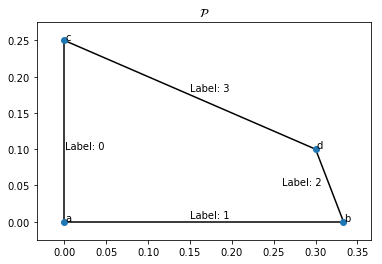

In [56]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial

V = [np.array([0, 0]), np.array([1 / 3, 0]), np.array([0, 1 / 4]), np.array([3/10, 1/10])]
P = scipy.spatial.ConvexHull(V)
scipy.spatial.convex_hull_plot_2d(P)
plt.title("$\mathcal{P}$")
plt.text(0.001, .1, "Label: 0")
plt.text(0.15, .005, "Label: 1")
plt.text(0.15, .18, "Label: 3")
plt.text(0.26, .05, "Label: 2")
for v, s in zip(V, "abcd"):
    plt.text(v[0] + 0.001, v[1] + 0.001, s);

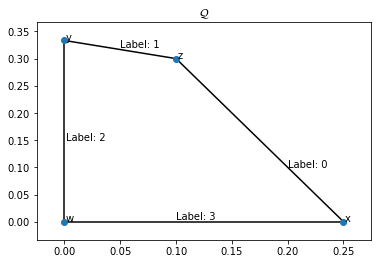

In [57]:
V = [np.array([0, 0]), np.array([1 / 4, 0]), np.array([0, 1 / 3]), np.array([1/10, 3/10])]
Q = scipy.spatial.ConvexHull(V)
scipy.spatial.convex_hull_plot_2d(Q)
plt.title("$\mathcal{Q}$")
plt.text(0.001, .15, "Label: 2")
plt.text(0.10, .005, "Label: 3")
plt.text(0.05, .32, "Label: 1")
plt.text(0.2, .1, "Label: 0")
for v, s in zip(V, "wxyz"):
    plt.text(v[0] + 0.001, v[1] + 0.001, s);

### (f) Carrying out the LH algorithm

Using the plot we can carry out the Lemke-Howson algorithm:

- Dropping label 0:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 0.
  - $\to (b, w)$ have labels $\{1, 2\}, \{2, 3\}$. In $\mathcal{Q}$ drop 2.
  - $\to (b, x)$ have labels $\{1, 2\}, \{0, 3\}$. Fully labeled vertex pair.

- Dropping label 1:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 1.
  - $\to (c, w)$ have labels $\{0, 3\}, \{2, 3\}$. In $\mathcal{Q}$ drop 3.
  - $\to (c, y)$ have labels $\{0, 3\}, \{1, 2\}$. Fully labeled vertex pair.
  
- Dropping label 2:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 2.
  - $\to (a, x)$ have labels $\{0, 1\}, \{0, 3\}$. In $\mathcal{P}$ drop 0.
  - $\to (b, x)$ have labels $\{1, 2\}, \{0, 3\}$. Fully labeled vertex pair.

- Dropping label 3:

  - $(a, w)$ have labels $\{0, 1\}, \{2, 3\}$. Drop 3.
  - $\to (a, y)$ have labels $\{0, 1\}, \{1, 2\}$. In $\mathcal{P}$ drop 1.
  - $\to (c, y)$ have labels $\{0, 3\}, \{1, 2\}$. Fully labeled vertex pair.
  
  [2]
  
We see that we have obtained two equilibria:
  
$$(b, x) = ((1/3, 0), (1/4, 0))$$

$$(c, y) = ((0, 1/4), (0, 1/3))$$

which gives the following two Nash equilibria:

$$((1, 0), (1, 0))$$

$$((0, 1), (0, 1))$$

[2]

Some code to verify:

In [58]:
import nash
A, B = np.array([[3, 1], [0, 2]]), np.array([[2, 1], [0, 3]])
game = nash.Game(A, B)
for label, eq in enumerate(game.lemke_howson_enumeration()):
    print(label, eq)

0 (array([ 1.,  0.]), array([ 1.,  0.]))
1 (array([ 0.,  1.]), array([ 0.,  1.]))
2 (array([ 1.,  0.]), array([ 1.,  0.]))
3 (array([ 0.,  1.]), array([ 0.,  1.]))


### (g)  **Using a different initial vertex pair**

- $(b, x)$ has labels $\{1, 2\}, \{0, 3\}$. Drop 3.
- $\to (b, z)$ have labels $\{1, 2\}, \{0, 1\}$. In $\mathcal{P}$ drop 1.
- $\to (d, y)$ have labels $\{2, 3\}, \{0, 1\}$. Fully labeled vertex pair.

[1]

This gives the Nash equilibria:

$$
((3/4, 1/4), (1/4, 3/4))
$$

some code to verify the result:

In [59]:
list(game.vertex_enumeration())

[(array([ 1.,  0.]), array([ 1.,  0.])),
 (array([ 0.,  1.]), array([ 0.,  1.])),
 (array([ 0.75,  0.25]), array([ 0.25,  0.75]))]

### (h) Sketch of proof

- We know that there is a path between $(0, 0)$ and a fully labelled vertex pair. [1]
- Similarly, from a fully labelled vertex pair we can assume that it's possible to drop another fully labelled vertex pairs. [1]
- We can construct a graph of pairs of fully labelled vertex pairs. [1]
- As we have pairs this corresponds to an even number of fully labelled vertex pairs. Removing $(0, 0)$ this implies there is an odd number of Nash equilibria. [1]

## Question 2

### (a) Definition of a Prisoner's Dilemma (bookwork)

$$
A =
\begin{pmatrix}
    R & S\\
    T & P
\end{pmatrix}\qquad
B =
\begin{pmatrix}
    R & T\\
    S & P
\end{pmatrix}
$$

with the following constraints:

$$T > R > P > S$$
$$2R > T + S$$

[2]

### (b) Finding valid Prisoner's Dilemmas

(i) 

For $A, B$ to be valid we need:

$$
\begin{pmatrix}
    3 & S\\
    5 & 1
\end{pmatrix}
=
\begin{pmatrix}
    R & S\\
    T & P
\end{pmatrix}
$$

which gives: $R=3, T=5, P=1$

further more:

$$
\begin{pmatrix}
    3 & T\\
    -1 & 1
\end{pmatrix}
=
\begin{pmatrix}
    R & T\\
    S & P
\end{pmatrix}
$$

[2]

which gives: $R=3, S=-1, P=1$

Thus we have (R, S, P, T) = (3, -1, 1, 5) which also follows the two required inequalities:

$$T > R > P > S \Leftrightarrow 5 > 3 > 1 > -1$$
$$2R > T + S \Leftrightarrow 6 > 4$$

[2]

(ii) 

For $A, B$ to be valid we need:

$$
\begin{pmatrix}
    2 & S\\
    -2 & 1
\end{pmatrix}
=
\begin{pmatrix}
    R & S\\
    T & P
\end{pmatrix}
$$

which gives: $R=2, T=-2, P=1$

We immediately see that $R > T$ so this cannot be a Prisoner's Dilemma.

[4]

### (c) Markov chain representation of a reactive player match

$$
M = \begin{pmatrix}
3/10 & 3/10 & 1/5 & 1/5\\
3/8 & 3/8 & 1/8 & 1/8\\
3/20 & 9/20 & 1/10 & 3/10\\
3/16 & 9/16 & 1/16 & 3/16\\
\end{pmatrix}
$$

### (d) Expected utility (bookwork)

The first player:

$$s_1s_2\times R +  s1(1-s_2) \times S +  (1-s_1)s_2 \times T + (1-s_1)(1-s_2)\times P$$

The second player:

$$s_1s_2\times R +  s1(1-s_2) \times T +  (1-s_1)s_2 \times S + (1-s_1)(1-s_2)\times P$$

where:

$$
s_1 = \frac{q_2r_1+p_2}{1-r_1r_2}\qquad s_2 = \frac{p_2r_2+q_2}{1-r_1r_2}
$$

for:

$$r_1=p_1-p_2\qquad r_2=q_1-q_2$$

### (e) Expected utility for specific type of player

Direct substitution gives:

$$P \left(1 - \frac{\frac{x}{8} + \frac{1}{4}}{- \frac{x}{8} + 1}\right) \left(- \frac{5 x}{- x + 8} + 1\right) + \frac{5 R x \left(\frac{x}{8} + \frac{1}{4}\right)}{8 \left(- \frac{x}{8} + 1\right)^{2}} + \frac{5 S x}{- x + 8} \left(1 - \frac{\frac{x}{8} + \frac{1}{4}}{- \frac{x}{8} + 1}\right) + \frac{T}{- \frac{x}{8} + 1} \left(\frac{x}{8} + \frac{1}{4}\right) \left(- \frac{5 x}{- x + 8} + 1\right)$$

substituting $(R, S, T, P)=(3, 0, 4, 1)$ factorising the $\frac{1}{(x - 8)^2}$ term gives:

$$
\frac{1}{\left(x - 8\right)^{2}} \left(3 x^{2} - 38 x + 112\right)
$$

expanding the required result gives the same as above.


### (f) Identifying the optimal behaviour

Direct differentiating gives:

$$
\frac{6 x - 38}{\left(x - 8\right)^{2}} - \frac{1}{\left(x - 8\right)^{3}} \left(6 x^{2} - 76 x + 224\right)=\frac{-10(x - 8)}{\left(x - 8\right)^{3}}=\frac{-10}{\left(x - 8\right)^{2}}
$$

[2]

simplifying gives the required result.

We see that our function is decreasing for all values of $x$ (it has negative derivative). Thus, the optimal value of $x$ is $0$.

[2]